# Qcodes example with Rohde Schwarz ZN20

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

from imp import reload
import qcodes as qc


In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB20 as vna; reload(vna)

<module 'qcodes.instrument_drivers.rohde_schwarz.ZNB20' from '/Users/jhn/src/Qcodes/qcodes/instrument_drivers/rohde_schwarz/ZNB20.py'>

In [3]:
# v1 =vna.ZNB20('VNA', 'TCPIP0::172.20.2.234::inst0::INSTR', server_name=None)
v1 =vna.ZNB20('VNA', 'TCPIP0::192.168.15.100::inst0::INSTR', server_name=None)

Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101551, firmware:2.10) in 0.11s


In [4]:
station = qc.Station(v1)

In [5]:
v1.trace()

([0.009646977277334165,
  0.0021979858842479604,
  0.011385066678388848,
  0.0036578559616232834,
  0.001534106152954764,
  0.0037237462606044343,
  0.0003013562395182502,
  0.005760142857503463,
  0.005929500614331058,
  0.0064628871815816695],
 [2.4181310614736207,
  1.9080227951332198,
  -0.5016603343918788,
  -2.9137114727849935,
  -1.7222804801278566,
  2.727342904656236,
  2.834714809822022,
  1.5005701652238659,
  -1.1597524510801358,
  2.9650693082434896])

In [6]:
v1.start(10e6)
v1.stop(800e6)
v1.avg(2)
v1.npts(100)

In [8]:
data1 = qc.Loop(v1.power[-15:-1:1]).each(v1.trace).run()

Started at 2017-05-19 10:47:47
DataSet:
   location = 'data/2017-05-19/#001_{name}_10-47-47'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (14,)
   Setpoint | frequency_set | frequency    | (14, 100)
   Measured | VNA_magnitude | magnitude    | (14, 100)
   Measured | VNA_phase     | phase        | (14, 100)
Finished at 2017-05-19 10:47:48


<IPython.core.display.Javascript object>


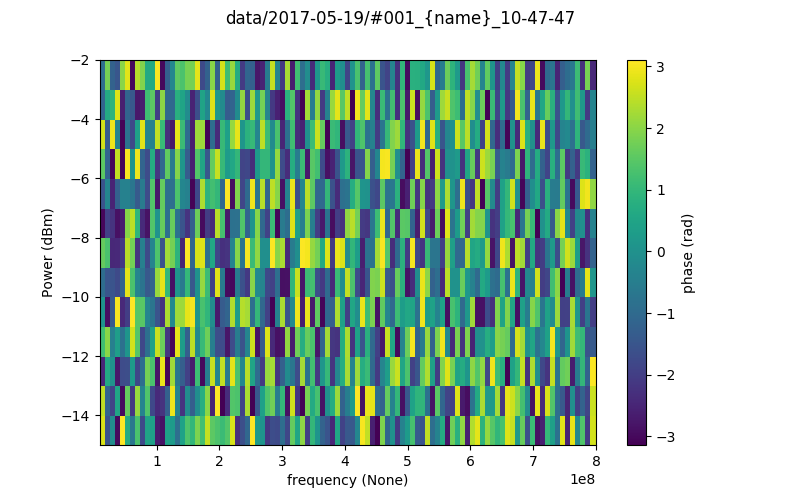

In [9]:
qc.MatPlot(data1.VNA_phase)

<IPython.core.display.Javascript object>


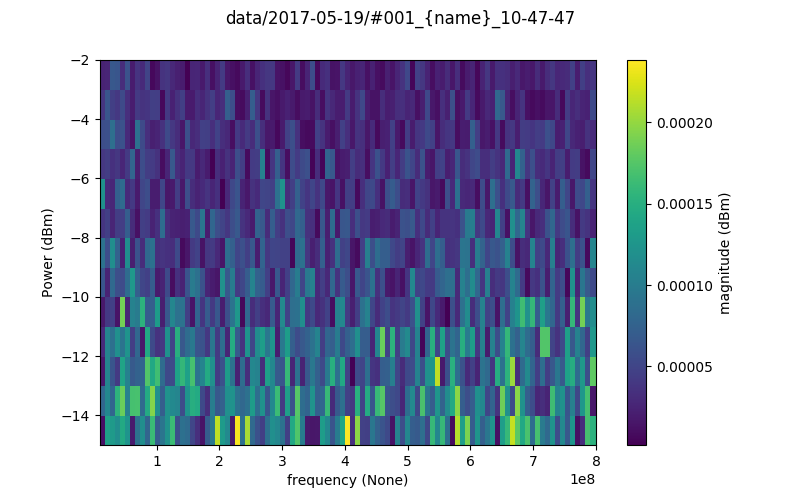

In [10]:
qc.MatPlot(data1.VNA_magnitude)

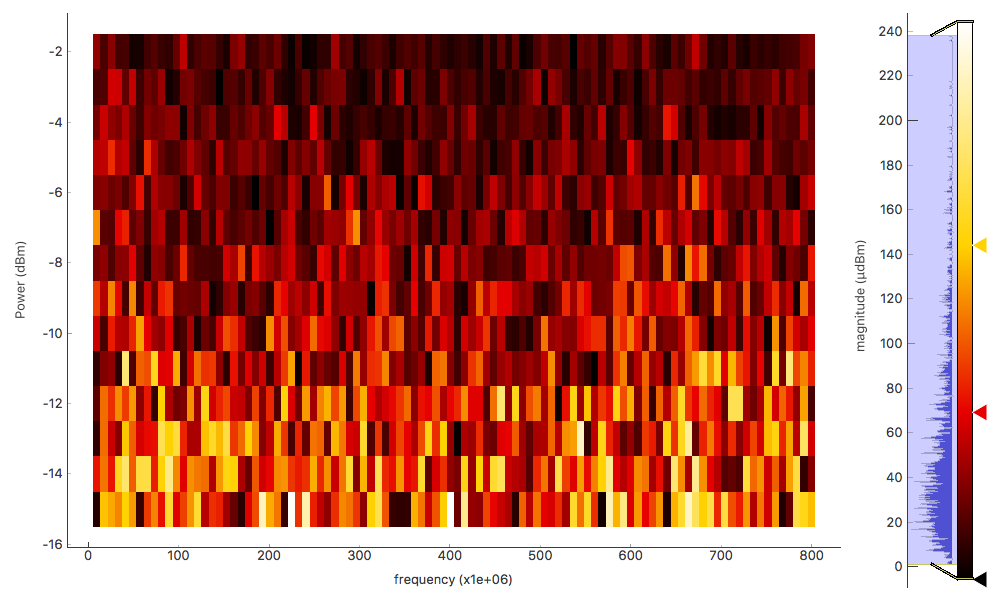

In [11]:
qc.QtPlot(data1.VNA_magnitude)